In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:90% !important;}</style>"))

import numpy as np
import csv
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import math
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import re
import collections
import string
from collections import OrderedDict
from mpl_toolkits import mplot3d
import random
import scipy.interpolate
import pandas as pd
import seaborn as sns
from matplotlib.ticker import ScalarFormatter

In [2]:
#reads in data from file and also strips the whitespace from it
all_data = pd.read_csv('data/varying_detRate-(0.0060-0.0600)_and_thresholdK-(0.4500-0.9500)-tau=0.200-BUGFIXED.txt').rename(columns=lambda x: x.strip())
max_gRate = 0.083
all_data['detR_ratio'] = all_data['det_rate']/max_gRate
print(all_data.keys())


Index(['#tau', 'sim_time', 'sim_time_stDev', 'exit_time', 'exit_time_stDev',
       'K*', 'det_rate', 'thickness', 'thick_stDev', 'n_deaths',
       'n_detachments', 'n_immigrations', 'n_replications', 'n_tau_halves',
       'detR_ratio'],
      dtype='object')


In [7]:
def plotKAndDetRColourMap(data, z_key, masky=None, annotated = False, id_filters=None, filename='dummy'):
    
    #converts the data into a heatmap usable format
    relevant_data = data[['K*', 'det_rate', z_key]].copy()
    data_pivoted = relevant_data.pivot("K*", "det_rate", z_key)
    
    #this highlights the results of interest
    #if no mask is provided, then this selects thickness values between 3 and 4
    #if a mask is provided, then it uses that mask, like for colouring the corresponding replication values
    masko = (data_pivoted < 3) | (data_pivoted > 4) if (masky is None) else masky
    
    

#     filtered=True
#     h_map = sns.heatmap(data_filter_pivoted, annot=True, fmt=".1f")
#     masked_map = sns.heatmap(data_filter_pivoted, mask = masko_filter, cmap='Greens', cbar=False, annot=True,fmt=".1f")
    
    
    fig, ax = plt.subplots()
    fig.set_size_inches(9, 7.2)
    titleSize = 16
    labelSize = 16
    numbersize = 14
    legendsize = 10
    IDsize=12
    
    filtered=False
    h_map = sns.heatmap(data_pivoted, annot=False, fmt=".1f")
    masked_map = sns.heatmap(data_pivoted, mask = masko, cmap='Greens', cbar=False, annot=annotated, fmt=".1f")
    
    
    ax.set_title("optimal N* and r_det", fontsize=titleSize)
    ax.invert_yaxis()
    ax.set_xlabel('deterioration rate', fontsize=labelSize)
    ax.set_ylabel('threshold density', fontsize=labelSize)
    ax.collections[0].colorbar.set_label(z_key, fontsize=labelSize)
    ax.xaxis.set_tick_params(labelsize=numbersize)
    ax.yaxis.set_tick_params(labelsize=numbersize)
    

#     if filtered:
#         plt.savefig('plots/squares_'+z_key+'_filtered.pdf', bbox_inches='tight')
#     else:
#         plt.savefig('plots/squares_'+z_key+'.pdf', bbox_inches='tight')
    plt.savefig('plots/'+filename+'.pdf')
    plt.show()
    #if masky is None and filtered: return (masko_filter, id_x) else (masko)
    return (masko_filter, id_x) if (masky is None and filtered) else (masko, None)

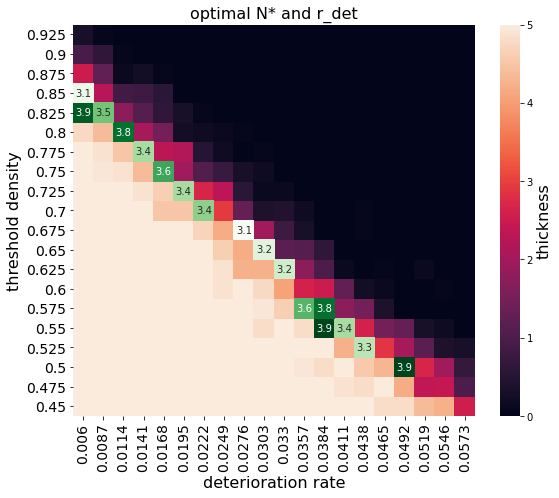

/home/patrick/anaconda3/lib/python3.8/site-packages/seaborn/matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/home/patrick/anaconda3/lib/python3.8/site-packages/seaborn/matrix.py:208: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


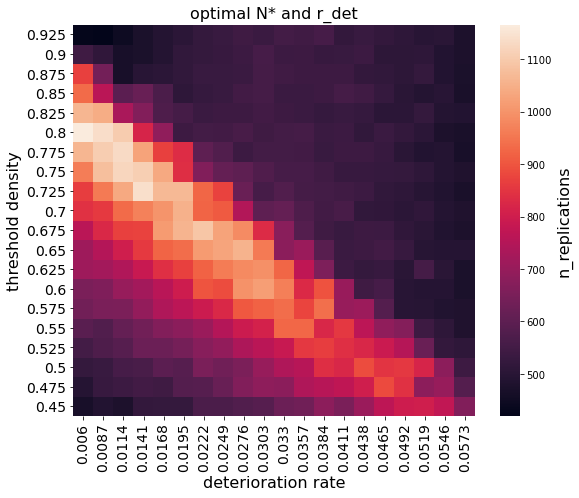

/home/patrick/anaconda3/lib/python3.8/site-packages/seaborn/matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/home/patrick/anaconda3/lib/python3.8/site-packages/seaborn/matrix.py:208: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


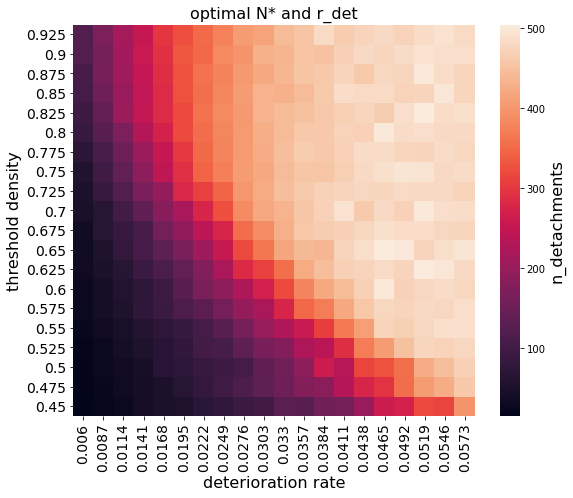

In [8]:
masko, _ = plotKAndDetRColourMap(all_data, 'thickness', annotated=True, filename='optimal-thickness')
_, _ = plotKAndDetRColourMap(all_data, 'n_replications', annotated=False, filename='optimal-replications')
_, _ = plotKAndDetRColourMap(all_data, 'n_detachments', annotated=False, filename='optimal-detachments')

In [5]:
def plotKAndDetRColourMap2(data, z_key, masky=None, annotated = False, id_filters=None, filename='dummy'):
    
    #converts the data into a heatmap usable format
    relevant_data = data[['K*', 'detR_ratio', z_key]].copy()
    data_pivoted = relevant_data.pivot("K*", "detR_ratio", z_key)
    
    #this highlights the results of interest
    #if no mask is provided, then this selects thickness values between 3 and 4
    #if a mask is provided, then it uses that mask, like for colouring the corresponding replication values
    masko = (data_pivoted < 3) | (data_pivoted > 4) if (masky is None) else masky
    
    

#     filtered=True
#     h_map = sns.heatmap(data_filter_pivoted, annot=True, fmt=".1f")
#     masked_map = sns.heatmap(data_filter_pivoted, mask = masko_filter, cmap='Greens', cbar=False, annot=True,fmt=".1f")
    
    
    fig, ax = plt.subplots(dpi=220)
    fig.set_size_inches(9, 7.2)
    titleSize = 16
    labelSize = 22
    numbersize = 14
    legendsize = 10
    IDsize=12
    
    filtered=False
    h_map = sns.heatmap(data_pivoted, annot=False, fmt=".1f")
    masked_map = sns.heatmap(data_pivoted, mask = masko, cmap='Greens', cbar=False)
    
    
    #ax.set_title("optimal N* and $r_{det}$", fontsize=titleSize)
    ax.invert_yaxis()
    ax.set_xlabel('($r_{det}$/g)', fontsize=labelSize)
    ax.set_ylabel('N*/K', fontsize=labelSize)
    ax.collections[0].colorbar.set_label(z_key, fontsize=labelSize)
    ax.xaxis.set_tick_params(labelsize=numbersize)
    ax.yaxis.set_tick_params(labelsize=numbersize)
    
    labels = [label.get_text() for label in ax.get_xticklabels()]
    ax.set_xticklabels(map(lambda x: "{:.2f}".format(float(x)), labels))
    

#     if filtered:
#         plt.savefig('plots/squares_'+z_key+'_filtered.pdf', bbox_inches='tight')
#     else:
#         plt.savefig('plots/squares_'+z_key+'.pdf', bbox_inches='tight')
    plt.savefig('plots/'+filename+'.pdf')
    plt.show()
    #if masky is None and filtered: return (masko_filter, id_x) else (masko)
    return (masko_filter, id_x) if (masky is None and filtered) else (masko, None)

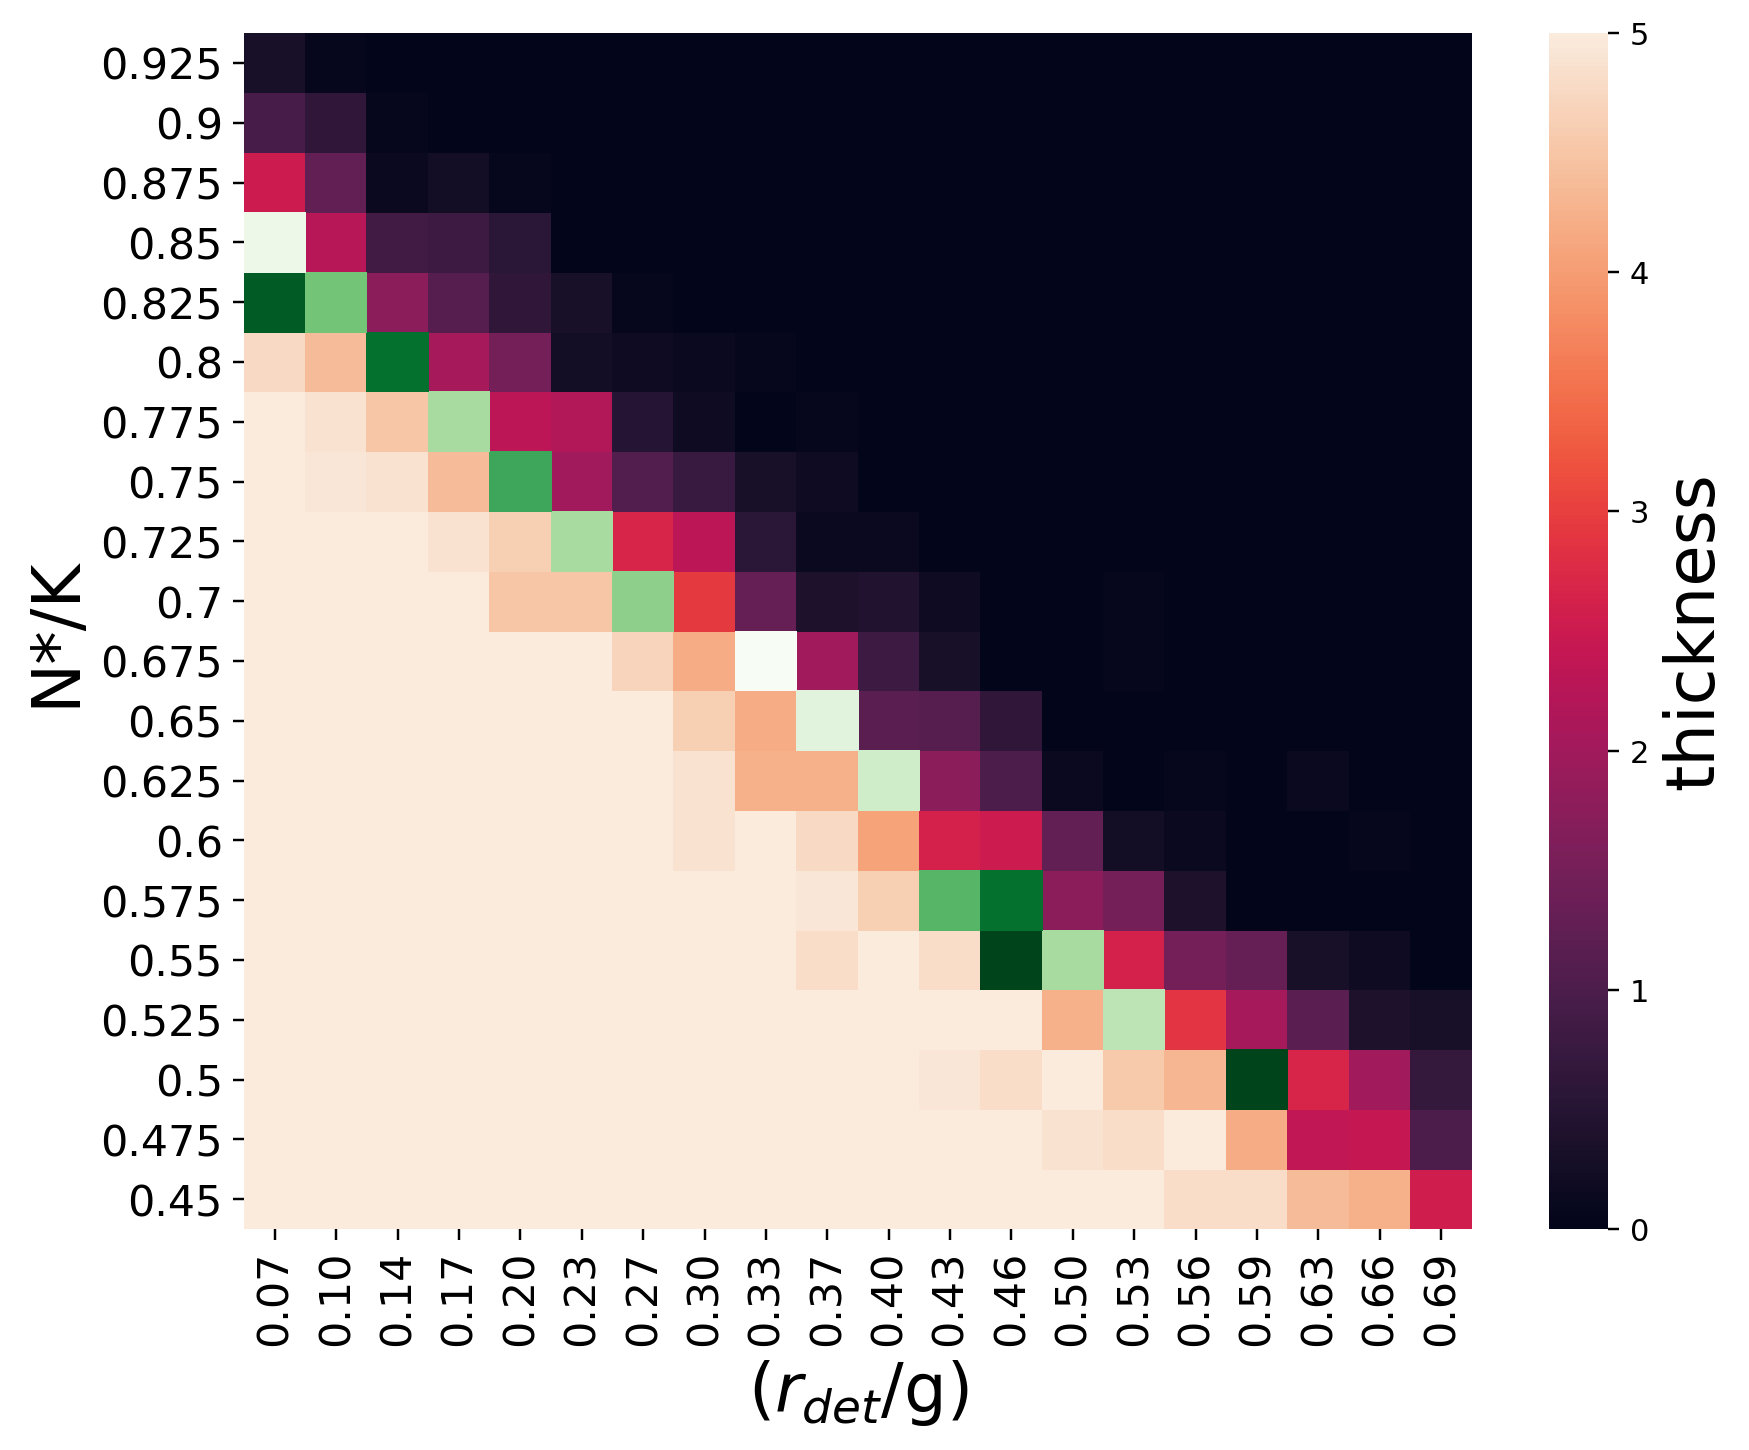

In [6]:
masko, _ = plotKAndDetRColourMap2(all_data, 'thickness', annotated=True, filename='optimal-thickness')